In [1]:
from IPython.core.display import display
from PIL import Image as Img
import random
import numpy as np

In [2]:
image_width = 250#416
image_height = 250#416

test_image = r'.\VOCdevkit\VOC2007\JPEGImages\000019.jpg'

In [3]:
def read_image(path):
    im = Img.open(path).resize((image_width, image_height))
    im = np.array(im, dtype = np.float32)
    return im

    
def normalize(imagearr):
    imagearr = np.where(imagearr >= 0, imagearr, 0)
    imagearr = np.where(imagearr <= 255, imagearr, 255)
    
    return imagearr

def display_image(imagearr):
    imagearr = normalize(imagearr)    
    imagearr = imagearr.astype(np.uint8)
    img = Img.fromarray(imagearr, 'RGB')
    display(img)


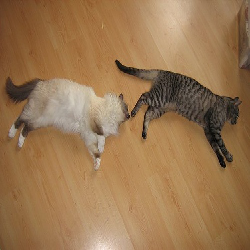

In [4]:
image = read_image(test_image)
display_image(image)

-15.455324969027696


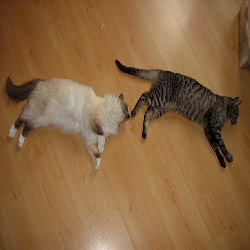

In [136]:
def change_brightness_slightly(im, range_):
    value = random.uniform(range_[0], range_[1])
    print(value)
    im += value
    return im

image = read_image(test_image)
image = change_brightness_slightly(image, (-30, 30))
display_image(image)

1.3264104601928586


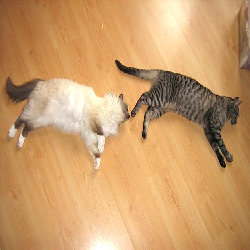

In [6]:
def change_brightness_not_so_slightly(im, radenge_):
    value = random.uniform(range_[0], range_[1])
    print(value)
    im *= value
    return im

image = read_image(test_image)

image = change_brightness_not_so_slightly(image, (0.5, 1.5))
display_image(image)

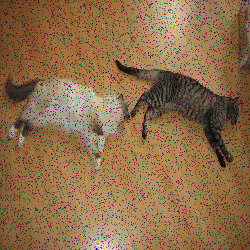

In [149]:
def dropout(im, chance):
    percent = random.uniform(0, chance)
    
    shapeprod = im.shape[0] * im.shape[1] * im.shape[2]
    falses = [False for i in range(int(percent * shapeprod))]
    trues = [True for i in range(int((1 - percent) * shapeprod) + 1)]
    mask = np.array(trues + falses)
    
    np.random.shuffle(mask)
    mask = mask.reshape(im.shape)
    
    im = np.where(mask, im, 0)
    
    return im
    
image = read_image(test_image)

image = dropout(image, (0.1))
display_image(image)

82.22764636132325


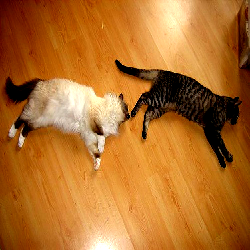

In [160]:
def adjust_contrast(im, range_):
    value = random.uniform(range_[0], range_[1])
    print(value)    
    factor = (259 * (value + 255)) / (255 * (259 - value))

    im = 128 + factor * (im - 128)
    
    return im

image = read_image(test_image)

image = change_contrast(image, (-100, 100))
display_image(image)

(250, 250, 3)


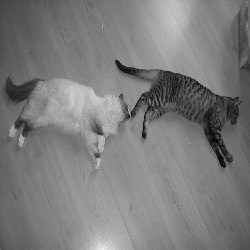

In [180]:
def grayscale(im):
    r, g, b = im[..., 0], im[..., 1], im[..., 2]
    
    im[..., 0] = 0.2989 * r + 0.5870 * g + 0.1140 * b
    im[..., 1] = im[..., 0]
    im[..., 2] = im[..., 0]
    
    return im

image = read_image(test_image)

image = grayscale(image)
print(image.shape)
display_image(image)

(250, 250, 3)


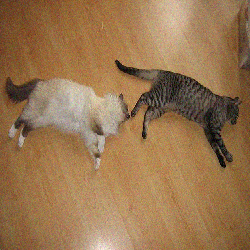

In [186]:
def noise(im, mean = 0, sigma = 10):
    gaussian = np.random.normal(mean, sigma, im.shape) 
    
    return im + gaussian

image = read_image(test_image)

image = noise(image)
print(image.shape)
display_image(image)